# Data Visualization in Python

In [ ]:
import pandas as pd
seattle_weather_monthly = pd.read_csv("seattle_weather_monthly.csv")

In [ ]:
seattle_weather_monthly.head()

,STATION,MONTH,MLY-PRCP-NORMAL,MLY-SNOW-NORMAL,MLY-TAVG-NORMAL,MLY-TMAX-NORMAL,MLY-TMIN-NORMAL
0,USW00024233,1,6.00,1.7,42.8,47.7,37.9
1,USW00024233,2,3.85,3.0,43.5,49.1,37.9
2,USW00024233,3,4.54,0.4,46.7,53.6,39.9
3,USW00024233,4,3.19,0.0,51.1,58.9,43.3
4,USW00024233,5,1.93,0.0,57.9,66.7,49.0


In [ ]:
import matplotlib.pyplot as plt

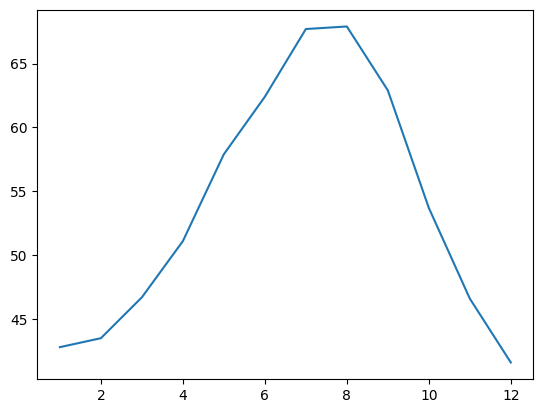

In [ ]:
fig, ax = plt.subplots()
ax.plot(seattle_weather_monthly["MONTH"], seattle_weather_monthly["MLY-TAVG-NORMAL"])
plt.show()

# Descriptive Statistics of Data in Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Mean is the average of values. For each numeric column (like sepal length), this computes the sum divided by the count. It shows the central tendency of data.

In [ ]:
df.mean(numeric_only=True)

,0
sepal_length,5.843333
sepal_width,3.054000
petal_length,3.758667
petal_width,1.198667


Median is the middle value when data is sorted. It’s more robust to outliers than the mean. Useful when data may be skewed.

In [ ]:
df.median(numeric_only=True)

,0
sepal_length,5.80
sepal_width,3.00
petal_length,4.35
petal_width,1.30


Mode is the most frequent value in a column. In numeric data it may not be meaningful, but for categorical variables, it helps identify the most common class.

In [ ]:
df.mode().iloc[0]

,0
sepal_length,5.0
sepal_width,3.0
petal_length,1.5
petal_width,0.2
species,setosa


Skewness measures asymmetry of the data distribution:

0 → Symmetrical (like normal distribution)

\> 0 → Right-skewed (long tail on right)

< 0 → Left-skewed (long tail on left)

In [ ]:
df.skew(numeric_only=True)

,0
sepal_length,0.314911
sepal_width,0.334053
petal_length,-0.274464
petal_width,-0.104997


In [ ]:
df['sepal_length'].skew()

np.float64(0.3149109566369728)

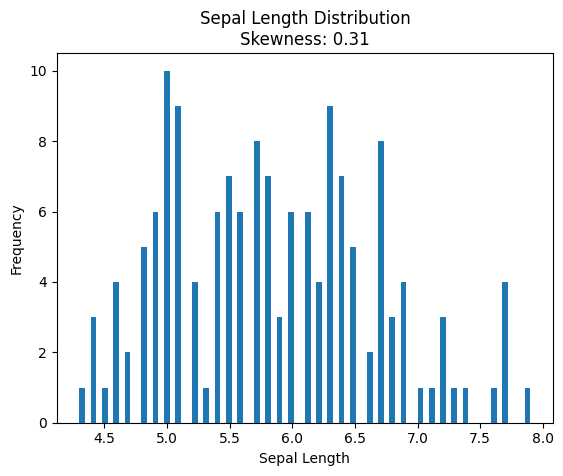

In [ ]:
data = df['sepal_length']

# Calculate skewness value
skewness = data.skew()

# Plot histogram
plt.hist(data, bins = 80)

# Add title and labels
plt.title(f'Sepal Length Distribution\nSkewness: {skewness:.2f}')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

# Show plot
plt.show()

Variance measures the average squared deviation from the mean. It shows how spread out the data is.

In [ ]:
df.var(numeric_only=True)

,0
sepal_length,0.685694
sepal_width,0.188004
petal_length,3.113179
petal_width,0.582414


Standard Deviation (SD) is the square root of variance. It's in the same unit as the data and is easier to interpret. It tells us how far values typically are from the mean.

In [ ]:
df.std(numeric_only=True)

,0
sepal_length,0.828066
sepal_width,0.433594
petal_length,1.764420
petal_width,0.763161


Nominal data are categories with no inherent order. Here, species has three categories (setosa, versicolor, virginica). There's no ranking between them.

In [ ]:
df['species'].unique()
# Nominal because it represents categories with no inherent order

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Ordinal data has a logical order. Here, we bin petal_length into size categories. Though not numeric, Small < Medium < Large.

In [ ]:
df['species'] = pd.Categorical(df['species'])


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


This categorizes petal_length into:

'Small' if 0 < petal_length ≤ 2

'Medium' if 2 < petal_length ≤ 5

'Large' if 5 < petal_length ≤ 7

In [ ]:
# Manual categorization (ordinal example)
bins = [0, 2, 5, 7]
labels = ['Small', 'Medium', 'Large']

df['petal_size'] = pd.cut(df['petal_length'], bins = bins, labels = labels)

df[['petal_length', 'petal_size']].head()

,petal_length,petal_size
0,1.4,Small
1,1.4,Small
2,1.3,Small
3,1.5,Small
4,1.4,Small


A bar plot visualizes the count of each category. Useful for nominal data like species. Helps show distribution or frequency of categories.

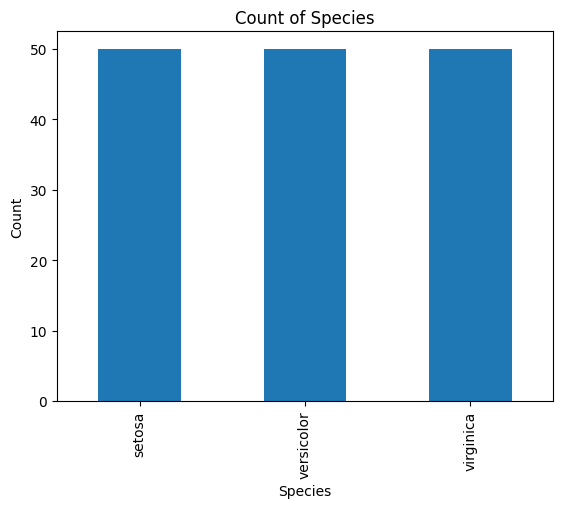

In [ ]:
df['species'].value_counts().plot(kind='bar', title='Count of Species', ylabel='Count', xlabel='Species')
plt.show()

Label Encoding converts categories into integers:

setosa → 0

versicolor → 1

virginica → 2

Best for ordinal data; for nominal, prefer One-Hot Encoding.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
df[['species', 'species_encoded']].head()

,species,species_encoded
0,setosa,0
1,setosa,0
2,setosa,0
3,setosa,0
4,setosa,0


One-Hot Encoding converts a categorical column into binary columns, one for each category:

species_setosa

species_versicolor

species_virginica

This avoids assuming an order among classes and is best for nominal data in ML models.

In [ ]:
df_ohe = pd.get_dummies(df, columns=['species'])
df_ohe.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_size,species_encoded,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,Small,0,True,False,False
1,4.9,3.0,1.4,0.2,Small,0,True,False,False
2,4.7,3.2,1.3,0.2,Small,0,True,False,False
3,4.6,3.1,1.5,0.2,Small,0,True,False,False
4,5.0,3.6,1.4,0.2,Small,0,True,False,False
